#### SyriaTel Customer Churn Prediction
Customer churn poses a major threat to SyriaTel,a telcom Service Provider, leading to revenue loss and increased marketing expenses. Retaining existing customers is significantly more cost-effective than acquiring new ones. This project aims to build a predictive model that identifies customers at high risk of churning, allowing SyriaTel to act before they leave.

By analyzing customer usage behavior, billing patterns, and service history, we can develop a churn prediction system that empowers the business to launch targeted retention efforts—such as personalized offers or proactive service follow-ups.

#### Problem Understanding

Business Challenge: SyriaTel wants to reduce churn by identifying customers likely to cancel their service.

Technical Approach: Build a binary classification model using customer activity, billing data, and service interactions to predict churn risk. The output will guide SyriaTel in taking data-driven actions to retain customers and minimize revenue loss.

In [2]:

# Import necessary libraries
# Data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Machine learning libraries
from sklearn.model_selection import (
    train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
)
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

# Evaluation metrics
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score, roc_curve,
    precision_recall_curve, accuracy_score, precision_score, recall_score, f1_score
)

# Plot settings
plt.style.use('default')
sns.set(style='whitegrid', palette='husl')


## **Data Loading and Initial Exploration**

We start by loading the dataset and gaining an initial understanding of its structure before diving into preprocessing or modeling.

Key steps in this section include:
- Loading the data from a CSV file
- Inspecting the dataset shape and column types
- Previewing the first few rows
- Checking for any missing values
- Generating basic descriptive statistics

In [8]:
# Load the dataset
df = pd.read_csv("C:/Users/user/Documents/MORINGA/Phase3/Phase3Project/TelcomData.csv")

In [9]:
df.shape

(3333, 21)

In [10]:
df.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

We observe:
- Most features are numerical, with a few categorical ones (`state`, `international plan`, `voice mail plan`, etc.).
- The target variable is `churn`, stored as a boolean.
- `phone number` and `state` may not be useful for prediction and could be dropped later.

In [11]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [12]:
df.isnull().sum() 

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

There are **no missing values** in the dataset. This saves us the effort of imputing or removing records at this stage.

In [13]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


Descriptive statistics reveal:
- `account length` ranges from 1 to 243 days.
- `customer service calls` varies from 0 to 9, which might indicate dissatisfaction.
- Call and charge distributions vary across time periods (day, evening, night, international), and some values are skewed such as  `total intl calls` has a low mean.


##  **Target Variable Analysis**

Understanding the distribution of our target variable ,`churn`, is crucial for:

- Identifying class imbalance  
- Setting appropriate evaluation metrics  
- Understanding the business context  

In [14]:
target_col = 'churn'
churn_counts = df[target_col].value_counts()
churn_counts

False    2850
True      483
Name: churn, dtype: int64

In [15]:
churn_percentages = df[target_col].value_counts(normalize=True) * 100
churn_percentages

False    85.508551
True     14.491449
Name: churn, dtype: float64

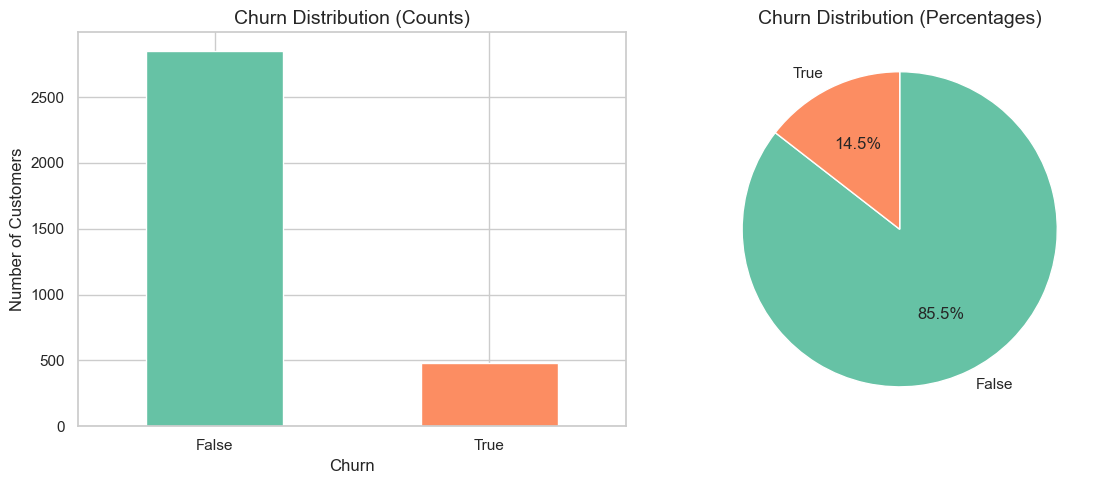

In [16]:

# Set a clear and professional Seaborn style
sns.set(style="whitegrid", palette="Set2")

# Define target column and compute value counts and percentages
target_col = 'churn'
churn_counts = df[target_col].value_counts()
churn_percentages = df[target_col].value_counts(normalize=True) * 100

# Set color palette manually to ensure consistency
color_palette = sns.color_palette("Set2", len(churn_counts))
color_map = dict(zip(sorted(churn_counts.index), color_palette))

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Bar Plot: Churn Counts
churn_counts.plot(
    kind='bar',
    ax=ax1,
    color=[color_map[val] for val in churn_counts.index]
)
ax1.set_title('Churn Distribution (Counts)', fontsize=14)
ax1.set_xlabel('Churn', fontsize=12)
ax1.set_ylabel('Number of Customers', fontsize=12)
ax1.tick_params(axis='x', rotation=0)

# Pie Chart: Churn Percentages
ax2.pie(
    churn_percentages.values,
    labels=churn_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    counterclock=False,
    colors=[color_map[val] for val in churn_counts.index],
    wedgeprops={'edgecolor': 'white'}
)
ax2.set_title('Churn Distribution (Percentages)', fontsize=14)

# Display plots
plt.tight_layout()
plt.show()


##  **Exploratory Data Analysis**

We will examine the relationships between features and the target variable to:
- Uncover patterns in customer behavior  
- Identify potential predictors of churn  
- Derive actionable business insights

In [17]:
# Separate numerical and categorical features
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = df.select_dtypes(include=['object', 'bool']).columns.tolist()

In [18]:
# Remove target from feature lists if present
if target_col in numerical_features:
    numerical_features.remove(target_col)
if target_col in categorical_features:
    categorical_features.remove(target_col)
    
print(f"Numerical features ({len(numerical_features)}): {numerical_features}")
print(f"Categorical features ({len(categorical_features)}): {categorical_features}")

Numerical features (16): ['account length', 'area code', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls']
Categorical features (4): ['state', 'phone number', 'international plan', 'voice mail plan']


We identified 16 numerical and 4 categorical features (excluding the target). Next, we'll analyze correlations among numerical features and explore the impact of categorical features on churn.

In [ ]:
# Correlation analysis for numerical features
# Correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = df[numerical_features + [target_col]].corr()

# Create heatmap
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, mask=mask, fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()